In [2]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os

dir_list = os.listdir('Primary Care Calibration\\Manually Validated Participants')
calList = pandas.read_excel('Primary Care Calibration\\Manually Validated Participants\\Calibration List.xlsx').to_numpy()

inds = np.zeros(len(dir_list)-1)
for i in range(len(dir_list)-1):
    if calList[i, 1]=='Good':
        inds[i] = 1

from sko.PSO import PSO
import random
import sys

def boxCircFunc(p, data):
    n = len(data[:, 0])
    dispMatr = np.ones(shape=(n))[None].T @ p[None]
    newData = data-dispMatr
    inds = np.where(np.logical_and(abs(newData[:, 0])<100, abs(newData[:, 1])<100))[0]
    l = len(inds)
    if l==0:
        return 99999999
    else:
        sum = 0
        p = 0
        for i in range(l):
            r2 = newData[inds[i], :] @ newData[inds[i], :]
            if r2 < 10000:
                sum = sum + r2
                p = p + 1
        if p == 0:
            return 99999999
        else:
            return sum/p**2

In [ ]:
minD = np.zeros(shape=(2, int(sum(inds))))
m = 0
for i in range(len(dir_list)-1):
    if inds[i]==1:
        data = pandas.read_csv('Primary Care Calibration\\Manually Validated Participants\\' + str(dir_list[i+1])).to_numpy()

        validData = np.zeros(shape=(int(sum(data[:, 3])), 6))

        j = 0
        for k in range(len(data[:, 0])):
            if data[k, 3] == 1:
                validData[j, :] = data[k, :]
                j= j + 1

        psoFunc = lambda p: boxCircFunc(p, validData[:, 4:])
        seed = random.randrange(0, sys.maxsize); random.seed(seed)
        pso = PSO(func=psoFunc, n_dim=2, pop=40, max_iter=30, lb=[0, 0], ub=[1920, 1080], w=0.7, c1=0.5, c2=0.5) # performs PSO fitting over omegas
        pso.run()

        minD[:, m] = pso.gbest_x
        m = m + 1

np.save('clusterData\\gen_pso_l2', minD)

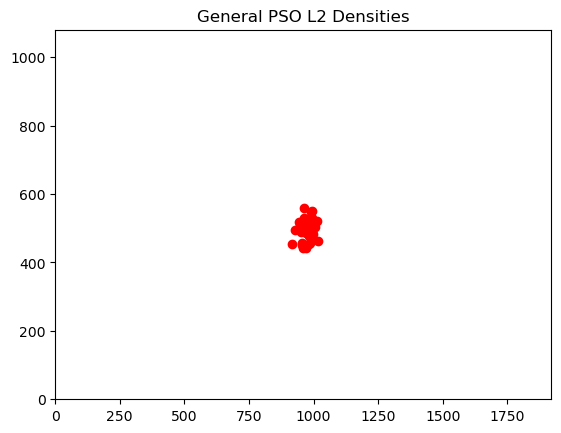

In [4]:
for i in range(int(sum(inds))):
    plt.plot(minD[0, i], minD[1, i], 'o', color='red')
plt.xlim(0, 1920); plt.ylim(0, 1080)
plt.title('General PSO L2 Densities')
plt.show()

In [37]:
def psoL2(xmin, xmax, ymin, ymax, iter):
    minD = np.zeros(shape=(2, int(sum(inds))))
    m = 0
    for i in range(len(dir_list)-1):
        if inds[i]==1:
            data = pandas.read_csv('Primary Care Calibration\\Manually Validated Participants\\' + str(dir_list[i+1])).to_numpy()
            for l in range(len(data[:, 0])):
                if data[l, 4]<xmin or data[l, 4]>xmax or data[l, 5]<ymin or data[l, 5]>ymax:
                    data[l, 3] = 0

            validData = np.zeros(shape=(int(sum(data[:, 3])), 6))

            j = 0
            for k in range(len(data[:, 0])):
                if data[k, 3] == 1:
                    validData[j, :] = data[k, :]
                    j= j + 1

            psoFunc = lambda p: boxCircFunc(p, validData[:, 4:])
            seed = random.randrange(0, sys.maxsize); random.seed(seed)
            pso = PSO(func=psoFunc, n_dim=2, pop=40, max_iter=iter, lb=[xmin, ymin], ub=[xmax, ymax], w=0.7, c1=0.5, c2=0.5) # performs PSO fitting over omegas
            pso.run()

            minD[:, m] = pso.gbest_x
            m = m + 1
    return minD

In [38]:
xmin = 0; xmax = 550
ymin = 200; ymax = 600
iter = 100

minD = psoL2(xmin, xmax, ymin, ymax, iter)

np.save('clusterData\\sidem_pso_l2', minD)

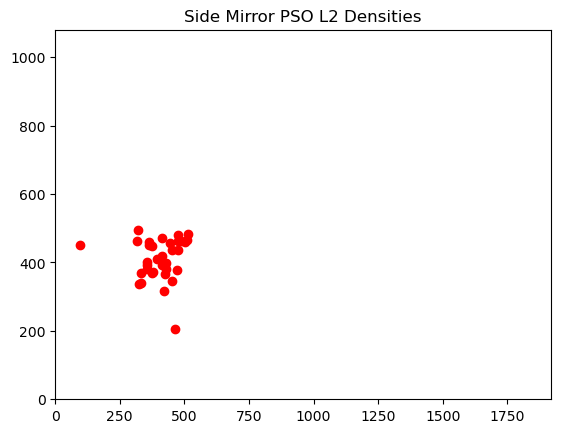

In [39]:
for i in range(int(sum(inds))):
    plt.plot(minD[0, i], minD[1, i], 'o', color='red')
plt.xlim(0, 1920); plt.ylim(0, 1080)
plt.title('Side Mirror PSO L2 Densities')
plt.show()

In [40]:
xmin = 820; xmax = 1000
ymin = 200; ymax = 370
iter = 30

minD = psoL2(xmin, xmax, ymin, ymax, iter)

np.save('clusterData\\speedom_pso_l2', minD)

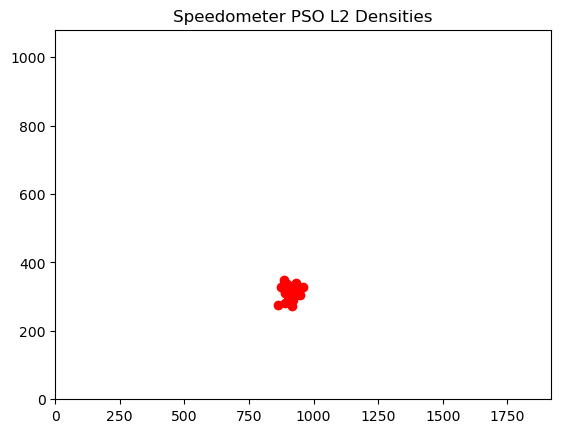

In [41]:
for i in range(int(sum(inds))):
    plt.plot(minD[0, i], minD[1, i], 'o', color='red')
plt.xlim(0, 1920); plt.ylim(0, 1080)
plt.title('Speedometer PSO L2 Densities')
plt.show()

In [42]:
xmin = 1300; xmax = 1900
ymin = 540; ymax = 800
iter = 30

minD = psoL2(xmin, xmax, ymin, ymax, iter)

np.save('clusterData\\rv_pso_l2', minD)

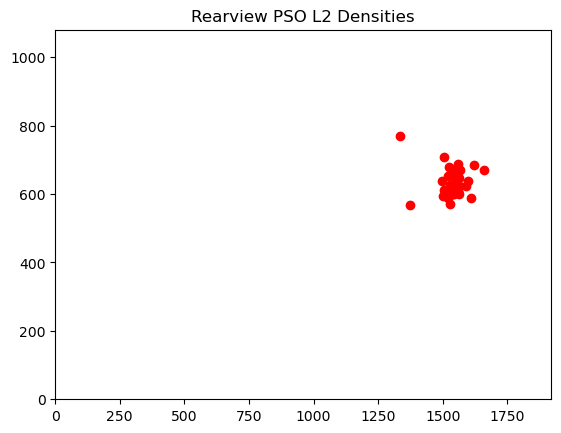

In [43]:
for i in range(int(sum(inds))):
    plt.plot(minD[0, i], minD[1, i], 'o', color='red')
plt.xlim(0, 1920); plt.ylim(0, 1080)
plt.title('Rearview PSO L2 Densities')
plt.show()

In [44]:
xmin = 600; xmax = 1050
ymin = 400; ymax = 550
iter = 30

minD = psoL2(xmin, xmax, ymin, ymax, iter)

np.save('clusterData\\road_pso_l2', minD)

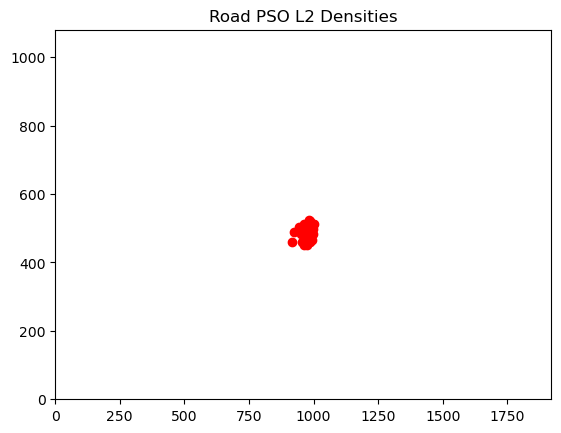

In [45]:
for i in range(int(sum(inds))):
    plt.plot(minD[0, i], minD[1, i], 'o', color='red')
plt.xlim(0, 1920); plt.ylim(0, 1080)
plt.title('Road PSO L2 Densities')
plt.show()

In [46]:
xmin = 1240; xmax = 1640
ymin = 50; ymax = 270
iter = 100

minD = psoL2(xmin, xmax, ymin, ymax, iter)

np.save('clusterData\\panel_pso_l2', minD)

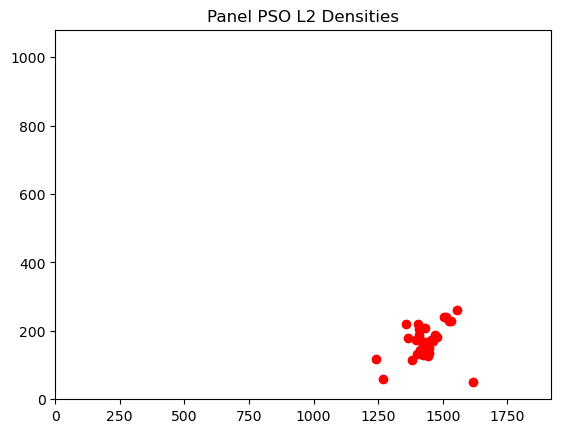

In [47]:
for i in range(int(sum(inds))):
    plt.plot(minD[0, i], minD[1, i], 'o', color='red')
plt.xlim(0, 1920); plt.ylim(0, 1080)
plt.title('Panel PSO L2 Densities')
plt.show()